<a href="https://colab.research.google.com/github/Ofir-Manor/Long3/blob/main/316084623-311288203.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1 align="center"> HW3 Major</h1>
<h1 align="center"> Regression</h1>

# Setting the Environment

In [1]:
#@title Setting the Environment:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import pylab
from typing import Union
params = {
    'xtick.labelsize': 18,
    'ytick.labelsize': 18,
    'axes.titlesize' : 22,
    'axes.labelsize' : 20,
    'legend.fontsize': 18,
    'legend.title_fontsize': 22,
    'figure.titlesize': 24
 }
pylab.rcParams.update(params)

## Preliminary: Updated Data Loading

In [2]:
'''
#@title Loading the dataset and the code files:
# load the csv file:
!rm *.csv
from google.colab import files
print("Please load the raw csv data: HW3_data")
uploadedData = files.upload()
filename = list(uploadedData)[0]
'''

'\n#@title Loading the dataset and the code files:\n# load the csv file:\n!rm *.csv\nfrom google.colab import files\nprint("Please load the raw csv data: HW3_data")\nuploadedData = files.upload()\nfilename = list(uploadedData)[0]\n'

In [3]:
# Jupyter Lab
filename = "HW3_data.csv"

In [4]:
#@title Create DF and split it:

dataset = pd.DataFrame(pd.read_csv(filename))
from sklearn.model_selection import train_test_split
random_state = 3 + 23
train_raw, test_raw = train_test_split(dataset, test_size=0.2, random_state=random_state)

In [5]:
from prepare_hw3 import prepare_data
# Prepare training set according to itself
train = prepare_data(train_raw, train_raw)
# Prepare test set according to the raw training data
test = prepare_data(train_raw, test_raw)

In [6]:
# Prep Linear Regressor training and validation set
from LinearRegressor import LinearRegressor
lin_reg_train, lin_reg_val = train_test_split(train, test_size=0.2, random_state=random_state)
lin_reg_train_x = lin_reg_train[lin_reg_train.columns.difference(["contamination_level"])]
lin_reg_train_y = lin_reg_train["contamination_level"]
lin_reg_val_x = lin_reg_val[lin_reg_val.columns.difference(["contamination_level"])]
lin_reg_val_y = lin_reg_val["contamination_level"]

In [7]:
# Copy of verify_gradients.py
def numerical_subgradient(w, b, X, y, delta=1e-4):
    w_ = w.copy()
    g_w = np.zeros_like(w_)
    orig_objective = LinearRegressor.loss(w_, b, X, y)
    for i in range(g_w.shape[0]):
        w_[i] += delta
        perturbed_objective = LinearRegressor.loss(w_, b, X, y)
        w_[i] -= delta
        g_w[i] = (perturbed_objective - orig_objective) / delta

    g_b = (LinearRegressor.loss(w_, b + delta, X, y) - orig_objective) / delta
    return g_w, g_b


def compare_gradients(X, y, deltas, C=1, REPEATS=10, figsize=(10, 6)):
    residual_means_w = []
    residual_means_b = []

    for delta in deltas:
        residuals_w = []
        residuals_b = []

        for _ in range(REPEATS):
            # Randomize vectors in which the gradient is computed
            w = np.random.randn(X.shape[1])
            b = np.random.randn(1)

            # Compute the two types of gradients
            analytic_grad_w, analytic_grad_b = LinearRegressor.gradient(w, b, X, y)

            numeric_grad_w, numeric_grad_b = numerical_subgradient(w, b, X, y, delta=delta)

            residual_w = np.linalg.norm(numeric_grad_w - analytic_grad_w)
            residuals_w.append(residual_w)

            residual_b = np.linalg.norm(numeric_grad_b - analytic_grad_b)
            residuals_b.append(residual_b)

        residual_means_w.append(np.mean(residuals_w))
        residual_means_b.append(np.mean(residuals_b))

    fig, axs = plt.subplots(nrows=1, ncols=2, sharey=True, figsize=(16, 8))
    plt.suptitle('Residuals of analytical and numerical gradients',
                 fontsize=22, fontweight="bold")
    axs[0].set_title(r'Residuals of $\nabla_{w}L\left(w,b\right)$')
    axs[1].set_title(r'Residuals of $\frac{\partial}{\partial{b}}L\left(w,b\right)$')
    axs[0].plot(deltas, residual_means_w, linewidth=3)
    axs[1].plot(deltas, residual_means_b, linewidth=3)
    axs[0].set_yscale('log')
    axs[0].set_xscale('log')
    axs[1].set_yscale('log')
    axs[1].set_xscale('log')
    axs[0].set_xlabel('$\delta_w$', fontsize=18)
    axs[1].set_xlabel('$\delta_b$', fontsize=18)
    axs[0].set_ylabel(r'$\left\Vert \nabla_{w}L\left(w,b\right) - u_{\delta_w} \left(w,b\right)\right\Vert$',
                      fontsize=18)
    axs[1].set_ylabel(
        r'$\left\Vert \frac{\partial}{\partial{b}}L\left(w,b\right) - u_{\delta_b} \left(w,b\right)\right\Vert$',
        fontsize=18)

    axs[0].grid(alpha=0.5)
    axs[1].grid(alpha=0.5)
    plt.show()

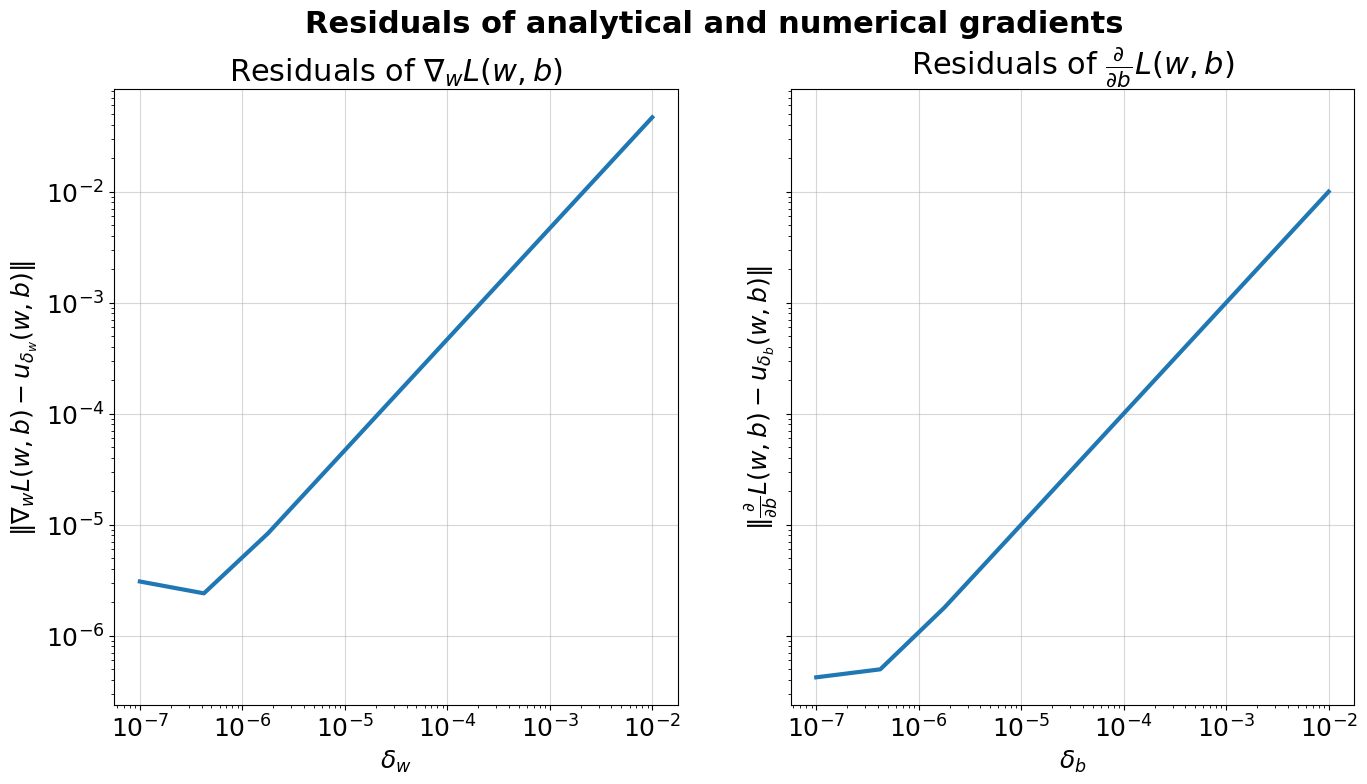

In [8]:
compare_gradients(lin_reg_train_x, lin_reg_train_y, deltas=np.logspace(-7, -2, 9))

In [9]:
# Copy of test_lr.py
import matplotlib.pyplot as plt
import numpy as np

def test_lr(X_train, y_train, X_val, y_val, title:str, max_iter = 1500):
  lr_list = np.logspace(-9, -1, 9)

  fig, axs = plt.subplots(3, 3, sharey=True, figsize=(20, 12))
  plt.suptitle(title, fontsize=32)
  plt.tight_layout()
  fig.subplots_adjust(hspace=0.5, top=0.9)
  
  axs = np.ravel(axs)
  for i, lr in enumerate(lr_list):
    cur_linear_reggressor = LinearRegressor(lr)
    train_losses, val_losses = cur_linear_reggressor.fit_with_logs(X_train, y_train, keep_losses=True, X_val=X_val, y_val=y_val, max_iter = max_iter)
    print('lr size = '+str(lr)+', Best train loss = '+str(min(train_losses))+', Best validation loss = '+str(min(val_losses)))

    iterations = np.arange(max_iter + 1)
    axs[i].semilogy(iterations, train_losses, label="Train")
    axs[i].semilogy(iterations, val_losses, label="Validation")
    axs[i].grid(alpha=0.5)git dgitr
    axs[i].legend()
    axs[i].set_title('lr = '+str(lr))
    axs[i].set_xlabel('iteration')
    axs[i].set_ylabel('MSE')

lr size = 1e-09, Best train loss = 387.4981802595634, Best validation loss = 421.5168420204055
lr size = 1e-08, Best train loss = 387.4487131166349, Best validation loss = 421.4671246584343
lr size = 1e-07, Best train loss = 386.9545740122952, Best validation loss = 420.9704813270224
lr size = 1e-06, Best train loss = 382.0660211082413, Best validation loss = 416.0566864215049
lr size = 1e-05, Best train loss = 338.09119751217077, Best validation loss = 371.81312331068693
lr size = 0.0001, Best train loss = 159.55779983992582, Best validation loss = 190.81767142386246
lr size = 0.001, Best train loss = 97.34239765483836, Best validation loss = 128.17551760233803
lr size = 0.01, Best train loss = 90.77378254595253, Best validation loss = 117.01114805168658
lr size = 0.1, Best train loss = 93.25528699440298, Best validation loss = 117.4817515745496


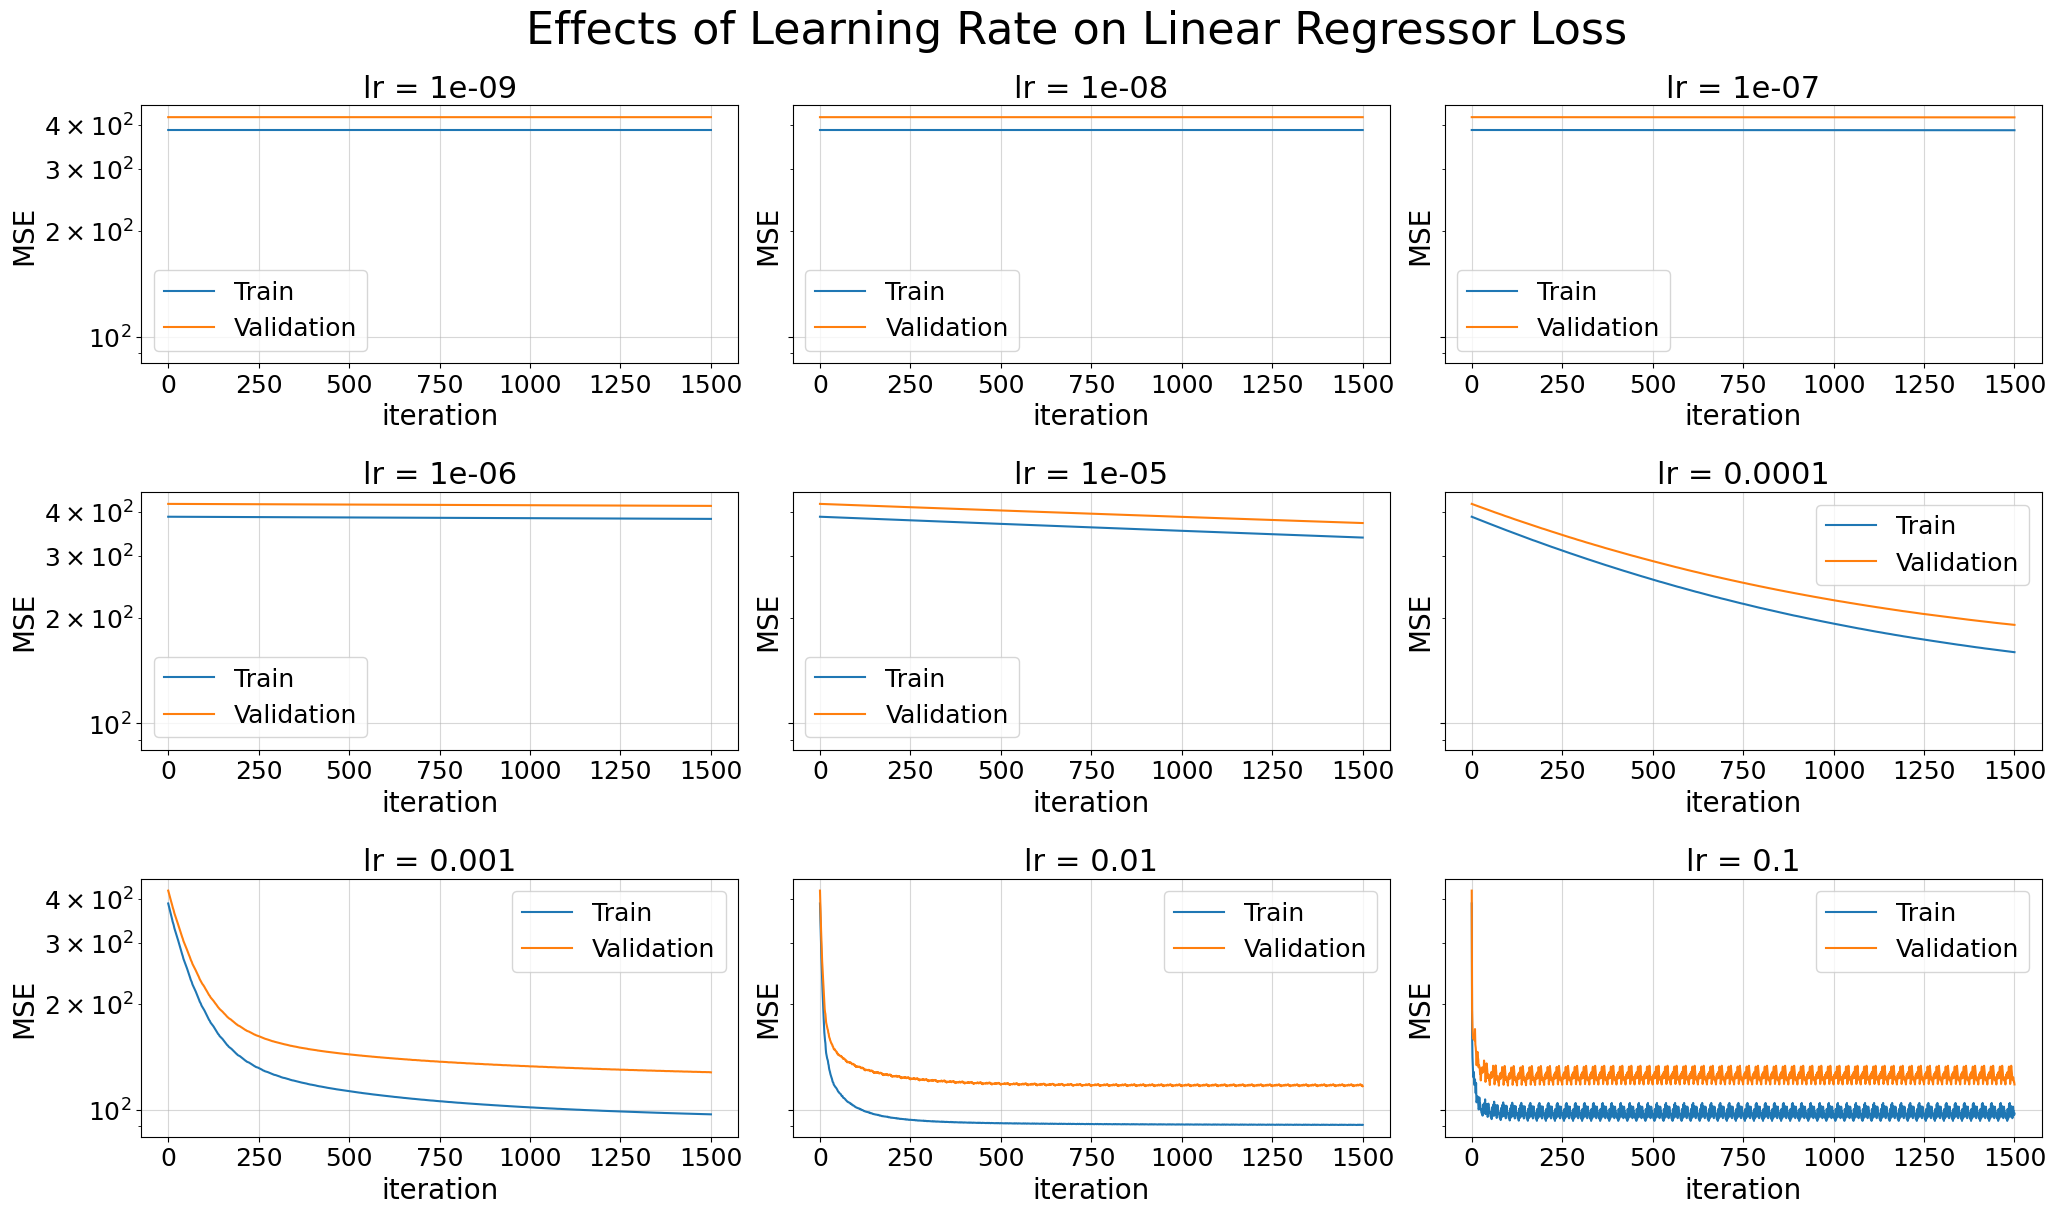

In [12]:
test_lr(lin_reg_train_x, lin_reg_train_y, lin_reg_val_x, lin_reg_val_y, title="Effects of Learning Rate on Linear Regressor Loss")